<a href="https://colab.research.google.com/github/diegonalvarez/machine-learning-group/blob/master/covid_19_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.shape

(17892, 8)

In [84]:
df

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0
...,...,...,...,...,...,...,...,...
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0


In [0]:
print(list(df))

['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'ConfirmedCases', 'Fatalities']


In [0]:
df.isnull().sum()

Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [0]:
df[df['Country/Region'] == 'Argentina'].count()

Id                63
Province/State     0
Country/Region    63
Lat               63
Long              63
Date              63
ConfirmedCases    63
Fatalities        63
dtype: int64

In [0]:
loc_group = ["Province/State", "Country/Region"]

def preprocess(df):
    df["Date"] = df["Date"].astype("datetime64[ms]")
    for col in loc_group:
        df[col].fillna('none', inplace=True)
    return df

df = preprocess(df)
sub_df = preprocess(pd.read_csv("test.csv"))
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,none,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,none,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,none,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,none,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,none,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [0]:
df["Date"].min(), df["Date"].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-03-24 00:00:00'))

In [0]:
TARGETS = ["ConfirmedCases", "Fatalities"]

for col in TARGETS:
    df[col] = np.log1p(df[col])

In [0]:
plt.plot(np.log1p(df[col], y , color = 'red', marker = "o") 
plt.title("numpy.log1p()") 
plt.xlabel("X") 
plt.ylabel("loc_group") 
plt.show()

SyntaxError: ignored

ERROR! Session/line number was not unique in database. History logging moved to new session 60


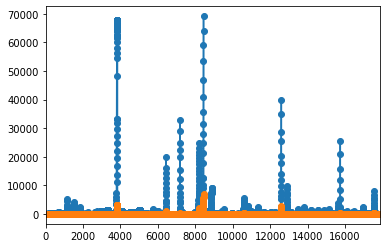

In [0]:
df.ConfirmedCases.plot(marker = "o")
df.Fatalities.plot(marker = "o")


out_array :  [0.69314718 0.78845736 0.87546874 0.95551145 1.02961942 1.09861229]


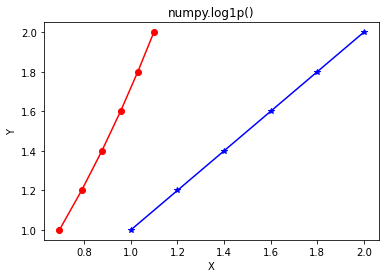

In [0]:
in_array = [1, 1.2, 1.4, 1.6, 1.8, 2] 
out_array = np.log1p(in_array) 
  
print ("out_array : ", out_array) 
  
y = [1, 1.2, 1.4, 1.6, 1.8, 2] 
plt.plot(in_array, y, color = 'blue', marker = "*") 
  
# red for numpy.log1xp() 
plt.plot(out_array, y, color = 'red', marker = "o") 
plt.title("numpy.log1p()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()  

In [0]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
for col in TARGETS:
    df["prev_{}".format(col)] = df.groupby(loc_group)[col].shift()

In [0]:
df = df[df["Date"] > df["Date"].min()].copy()
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,prev_ConfirmedCases,prev_Fatalities
1,2,none,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0.0,0.0
2,3,none,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0.0,0.0
3,4,none,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0.0,0.0
4,5,none,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0.0,0.0
5,6,none,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0,0.0,0.0


In [0]:
from datetime import timedelta

TEST_DAYS = 7

TRAIN_LAST =  - timedelta(days=TEST_DAYS)
print(TRAIN_LAST)

TEST_FIRST = sub_df["Date"].min()
TEST_DAYS = (df["Date"].max() - TEST_FIRST).days + 1

dev_df, test_df = df[df["Date"] < TEST_FIRST].copy(), df[df["Date"] >= TEST_FIRST].copy()
dev_df.shape, test_df.shape

-7 days, 0:00:00


((13916, 10), (3692, 10))

In [0]:
dev_df.head(7)


,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,prev_ConfirmedCases,prev_Fatalities
1,2,none,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0.0,0.0
2,3,none,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0.0,0.0
3,4,none,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0.0,0.0
4,5,none,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0.0,0.0
5,6,none,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0,0.0,0.0
6,7,none,Afghanistan,33.0,65.0,2020-01-28,0.0,0.0,0.0,0.0
7,8,none,Afghanistan,33.0,65.0,2020-01-29,0.0,0.0,0.0,0.0


In [0]:
test_df.head(7)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,prev_ConfirmedCases,prev_Fatalities
50,51,none,Afghanistan,33.0,65.0,2020-03-12,2.079442,0.0,2.079442,0.0
51,52,none,Afghanistan,33.0,65.0,2020-03-13,2.079442,0.0,2.079442,0.0
52,53,none,Afghanistan,33.0,65.0,2020-03-14,2.484907,0.0,2.079442,0.0
53,54,none,Afghanistan,33.0,65.0,2020-03-15,2.833213,0.0,2.484907,0.0
54,55,none,Afghanistan,33.0,65.0,2020-03-16,3.091042,0.0,2.833213,0.0
55,56,none,Afghanistan,33.0,65.0,2020-03-17,3.135494,0.0,3.091042,0.0
56,57,none,Afghanistan,33.0,65.0,2020-03-18,3.135494,0.0,3.135494,0.0


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear', LinearRegression())])

features = ["prev_{}".format(col) for col in TARGETS]

model.fit(dev_df[features], dev_df[TARGETS])

[mean_squared_error(dev_df[TARGETS[i]], model.predict(dev_df[features])[:, i]) for i in range(len(TARGETS))]

[0.03772997028857716, 0.003973213680396376]

In [0]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def evaluate(df):
    error = 0
    for col in TARGETS:
        error += rmse(df[col].values, df["pred_{}".format(col)].values)
    return np.round(error/len(TARGETS), 5)


def predict(test_df, first_day, num_days, val=False):

    y_pred = model.predict(test_df.loc[test_df["Date"] == first_day][features])

    for i, col in enumerate(TARGETS):
        test_df["pred_{}".format(col)] = 0
        test_df.loc[test_df["Date"] == first_day, "pred_{}".format(col)] = y_pred[:, i]

    if val:
        print(first_day, evaluate(test_df[test_df["Date"] == first_day]))

    for d in range(1, num_days):
        y_pred = model.predict(y_pred)
        date = first_day + timedelta(days=d)

        for i, col in enumerate(TARGETS):
            test_df.loc[test_df["Date"] == date, "pred_{}".format(col)] = y_pred[:, i]

        if val:
            print(date, evaluate(test_df[test_df["Date"] == date]))
        
    return test_df

test_df = predict(test_df, TEST_FIRST, TEST_DAYS, val=True)
evaluate(test_df)


2020-03-12 00:00:00 2084.76811
2020-03-13 00:00:00 2132.73902
2020-03-14 00:00:00 2173.88709
2020-03-15 00:00:00 2221.35768
2020-03-16 00:00:00 2277.73648
2020-03-17 00:00:00 2343.3756
2020-03-18 00:00:00 2432.24404
2020-03-19 00:00:00 2562.20481
2020-03-20 00:00:00 2719.32257
2020-03-21 00:00:00 2904.65923
2020-03-22 00:00:00 3079.43242
2020-03-23 00:00:00 3311.8291
2020-03-24 00:00:00 3480.76919


2632.85828

In [0]:
for col in TARGETS:
    test_df[col] = np.expm1(test_df[col])
    test_df["pred_{}".format(col)] = np.expm1(test_df["pred_{}".format(col)])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
SUB_FIRST = sub_df["Date"].min()
SUB_DAYS = (sub_df["Date"].max() - sub_df["Date"].min()).days + 1

sub_df = dev_df.append(sub_df, sort=False)

for col in TARGETS:
    sub_df["prev_{}".format(col)] = sub_df.groupby(loc_group)[col].shift()
    
sub_df = sub_df[sub_df["Date"] >= SUB_FIRST].copy()
sub_df["ForecastId"] = sub_df["ForecastId"].astype(np.int16)
sub_df = predict(sub_df, SUB_FIRST, SUB_DAYS)

for col in TARGETS:
    sub_df[col] = np.expm1(sub_df["pred_{}".format(col)])
    
sub_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,prev_ConfirmedCases,prev_Fatalities,ForecastId,pred_ConfirmedCases,pred_Fatalities
0,NaN,none,Afghanistan,33.0,65.0,2020-03-12,8.188832,0.005999,2.079442,0.0,1,2.217989,0.005981
1,NaN,none,Afghanistan,33.0,65.0,2020-03-13,9.594185,0.013179,NaN,NaN,2,2.360305,0.013093
2,NaN,none,Afghanistan,33.0,65.0,2020-03-14,11.255433,0.021677,NaN,NaN,3,2.505969,0.021446
3,NaN,none,Afghanistan,33.0,65.0,2020-03-15,13.218007,0.031636,NaN,NaN,4,2.654509,0.031146
4,NaN,none,Afghanistan,33.0,65.0,2020-03-16,15.533817,0.043205,NaN,NaN,5,2.805408,0.042298


In [0]:
print(SUB_FIRST)

2020-03-12 00:00:00


In [0]:
print(SUB_DAYS)

43


In [0]:
print(sub_df["Date"].max())

2020-04-23 00:00:00


In [0]:
sub_df.Date.sort_values(ascending=True)

0       2020-03-12
7396    2020-03-12
7912    2020-03-12
602     2020-03-12
258     2020-03-12
           ...    
8040    2020-04-23
8083    2020-04-23
8126    2020-04-23
7868    2020-04-23
12211   2020-04-23
Name: Date, Length: 12212, dtype: datetime64[ns]

In [0]:
sub_df[(sub_df['Date'] > '2020-04-01') & (sub_df['Country/Region'] == 'Argentina')]

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,prev_ConfirmedCases,prev_Fatalities,ForecastId,pred_ConfirmedCases,pred_Fatalities
236,NaN,none,Argentina,-38.4161,-63.6167,2020-04-02,331.102838,6.720726,NaN,NaN,237,5.805445,2.043908
237,NaN,none,Argentina,-38.4161,-63.6167,2020-04-03,362.802712,7.321666,NaN,NaN,238,5.896612,2.118862
238,NaN,none,Argentina,-38.4161,-63.6167,2020-04-04,396.341512,7.978523,NaN,NaN,239,5.984796,2.194835
239,NaN,none,Argentina,-38.4161,-63.6167,2020-04-05,431.767435,8.697350,NaN,NaN,240,6.070200,2.271853
240,NaN,none,Argentina,-38.4161,-63.6167,2020-04-06,469.144794,9.485017,NaN,NaN,241,6.153041,2.349947
241,NaN,none,Argentina,-38.4161,-63.6167,2020-04-07,508.557966,10.349329,NaN,NaN,242,6.233544,2.429159
242,NaN,none,Argentina,-38.4161,-63.6167,2020-04-08,550.115465,11.299181,NaN,NaN,243,6.311944,2.509533
243,NaN,none,Argentina,-38.4161,-63.6167,2020-04-09,593.954158,12.344722,NaN,NaN,244,6.388484,2.591121
244,NaN,none,Argentina,-38.4161,-63.6167,2020-04-10,640.243710,13.497555,NaN,NaN,245,6.463410,2.673980
245,NaN,none,Argentina,-38.4161,-63.6167,2020-04-11,689.191324,14.770976,NaN,NaN,246,6.536969,2.758171


In [0]:
sub_df[(sub_df['Date'] > '2020-04-01') & (sub_df['Country/Region'] == 'Mexico')]

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,prev_ConfirmedCases,prev_Fatalities,ForecastId,pred_ConfirmedCases,pred_Fatalities
6772,NaN,none,Mexico,23.6345,-102.5528,2020-04-02,193.185756,0.682750,NaN,NaN,6773,5.268815,0.520429
6773,NaN,none,Mexico,23.6345,-102.5528,2020-04-03,213.249567,0.753758,NaN,NaN,6774,5.367142,0.561761
6774,NaN,none,Mexico,23.6345,-102.5528,2020-04-04,234.131801,0.829506,NaN,NaN,6775,5.460146,0.604046
6775,NaN,none,Mexico,23.6345,-102.5528,2020-04-05,255.704920,0.910165,NaN,NaN,6776,5.547927,0.647190
6776,NaN,none,Mexico,23.6345,-102.5528,2020-04-06,277.834422,0.995919,NaN,NaN,6777,5.630618,0.691104
6777,NaN,none,Mexico,23.6345,-102.5528,2020-04-07,300.383125,1.086961,NaN,NaN,6778,5.708382,0.735709
6778,NaN,none,Mexico,23.6345,-102.5528,2020-04-08,323.215290,1.183500,NaN,NaN,6779,5.781408,0.780929
6779,NaN,none,Mexico,23.6345,-102.5528,2020-04-09,346.200396,1.285762,NaN,NaN,6780,5.849902,0.826699
6780,NaN,none,Mexico,23.6345,-102.5528,2020-04-10,369.216404,1.393991,NaN,NaN,6781,5.914088,0.872962
6781,NaN,none,Mexico,23.6345,-102.5528,2020-04-11,392.152419,1.508454,NaN,NaN,6782,5.974197,0.919667
